# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [1]:
## 라이브러리 불러오기 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## 동일 경로에 "train.csv" 가 있다는 가정하에
## dataframe으로 csv 데이터 불러오기

ttnic_df = pd.read_csv("./train.csv")

## 1. 분석의 목적과 변수 확인


- 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?

### 가볍게 데이터 파악하기
- 변수(column) 확인하기

In [3]:
# 상단 5개 행의 데이터

ttnic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 각 column의 데이터 타입 확인하기

In [4]:
ttnic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

### 데이터 전체 정보를 얻는 함수 : .describe()
- **수치형 데이터**에 대한 요약만을 제공!

In [5]:
# 수치 데이터에 대한 정보 요약본

ttnic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 상관계수 확인 함수 : .corr()

- Correlation is **NOT** Causation 
 상관관계는 인관관계가 아니다.

 상관성 : A up, B up ...  
 인관성 : A -> B

In [6]:
## 상관계수 확인

ttnic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

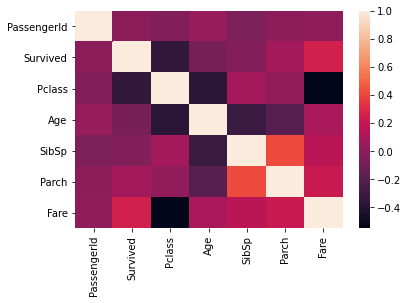

In [7]:
sns.heatmap(ttnic_df.corr())

### 결측치 확인 (Not A Number) - NAN

- 상황에 따라 결측치를 무시할 지, 대체 값을 넣어줄지, 그대로 값으로 판단할지 정해야함

In [8]:
# 결측치를 보기 쉽게  각 행에 따른 sum()함수값으로 가져오기

ttnic_df.isnull().sum()
# Age, Cabin, Embarked에서 결측치 확인!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

## I. Survived Column

In [9]:
# 생존자, 사망자 명수는?

#ttnic_df['Survived'].sum()  # 생존자 수의 합
ttnic_df['Survived'].value_counts() # 각 값의 count

0    549
1    342
Name: Survived, dtype: int64

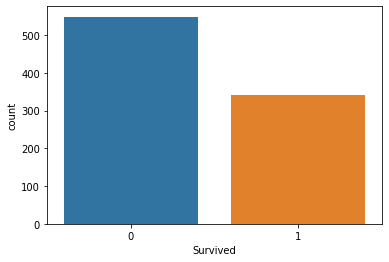

In [10]:
# 생존자수와 사망자수를 Barplot으로 그려보기 sns.countplot()

#sns.countplot(x = ttnic_df['Survived'])
sns.countplot(x='Survived', data = ttnic_df)
plt.show()

## II. Pclass

In [11]:
# 열(column)을 불러올 때, list로 원하는 변수만 가져올 수 있다

ttnic_df[['Pclass','Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [12]:
# Pclass에 따른 인원 파악

ttnic_df[['Pclass','Survived']].groupby(by=['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
# Pclass에 따른 생존자 인원

#ttnic_df['Survived'].groupby(by=ttnic_df['Pclass']).sum()
ttnic_df[['Pclass','Survived']].groupby(by=['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
# 각 클래스당 전체 인원대비 생존자 비율

ttnic_df[['Pclass','Survived']].groupby(by=['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


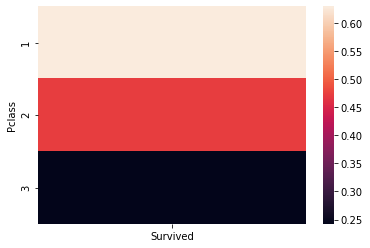

In [15]:
# 히트맵 활용

sns.heatmap(ttnic_df[['Pclass','Survived']].groupby(by=['Pclass']).mean())
plt.show()

## III. Sex

In [16]:
# groupby 기준을 2가지로 두어서 성별에 따른 생존 맻 사망자

ttnic_df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

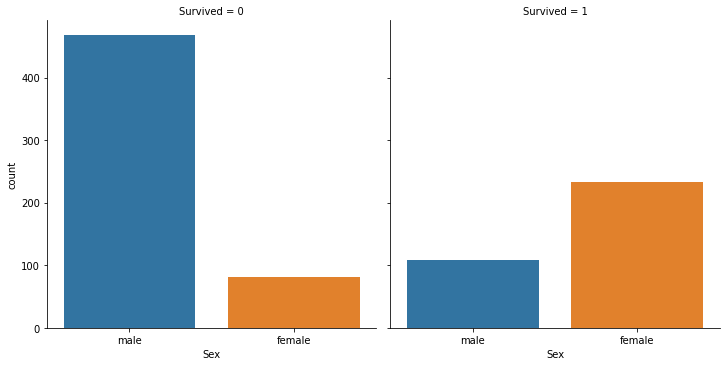

In [17]:
# sns.catplot

sns.catplot(x='Sex', col='Survived', kind='count',data=ttnic_df)
plt.show()

## IV. Age

**Remind : 결측치 존재!**

In [18]:
# Age에 대한 대략적 분석 (연속적 데이터)

ttnic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

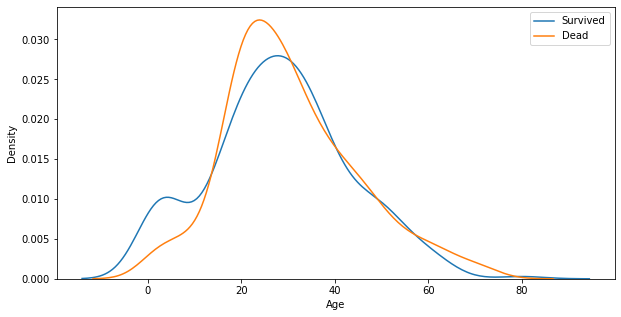

In [19]:
## 나이에 따른 생존의 경향성

fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(x=ttnic_df[ttnic_df['Survived'] == 1]['Age'],ax=ax)
sns.kdeplot(x=ttnic_df[ttnic_df['Survived'] == 0]['Age'],ax=ax)

plt.legend(['Survived','Dead'])

plt.show()

## Appendix I. Sex + Pclass vs Survived

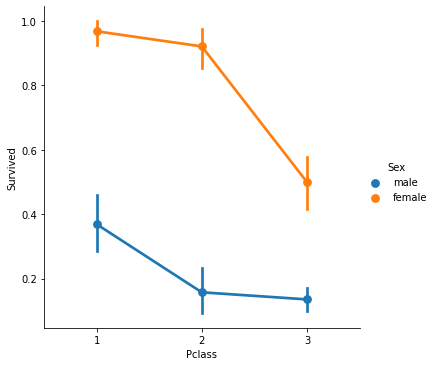

In [20]:
sns.catplot(x='Pclass',y='Survived', hue ='Sex',kind='point',data=ttnic_df)
# 추정치 막대기가 신뢰주간

plt.show()

## Appendix II. Age + Pclass

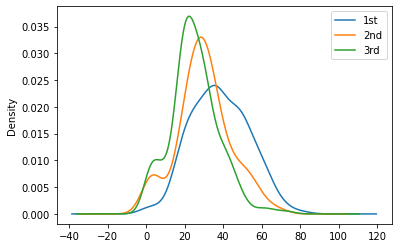

In [21]:
## Age graph with Pclass

ttnic_df['Age'][ttnic_df.Pclass==1].plot(kind ='kde')
ttnic_df['Age'][ttnic_df.Pclass==2].plot(kind ='kde')
ttnic_df['Age'][ttnic_df.Pclass==3].plot(kind ='kde')

plt.legend(['1st','2nd','3rd'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

#### 무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다:
1. 데이터를 톺아봅시다.  
    - 각 데이터는 어떤 자료형을 가지고 있나요?  
    - 데이터에 **결측치**는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?  
    - 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding
2. 데이터에 대한 가설을 세워봅시다.
    - 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
    - 가설은 명확할 수록 좋습니다 ex) *Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다!*
3. 가설을 검증하기 위한 증거를 찾아봅시다.
    - 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야합니다.  
    - `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
    - `.merge()`를 통해서 두개 이상의 dataFrame을 합치면 어떨까요?
    - 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?

------

## It's My Turn!

## Mission 1.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [23]:
ttnic_df = pd.read_csv("./train.csv")

### Fare vs Survived

**나의 가설** : 금액(Fare)을 많이 낸 사람이 더 잘 생존(Survived)하지 않았을까? ( $\approx$ 부자들이 살아남으려 더 애를 쓰지 않았을까? )

In [24]:
ttnic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# 결측치 존재 여부

ttnic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [26]:
ttnic_df[['Survived','Fare']]

,Survived,Fare
0,0,7.2500
1,1,71.2833
2,1,7.9250
3,1,53.1000
4,0,8.0500
...,...,...
886,0,13.0000
887,1,30.0000
888,0,23.4500
889,1,30.0000


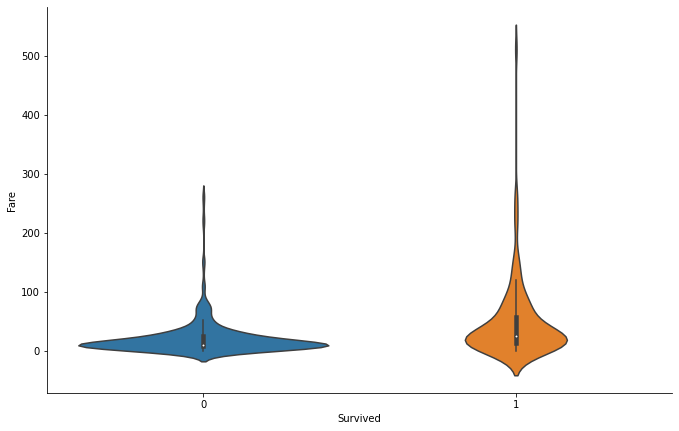

In [27]:
s = sns.catplot(x='Survived',y='Fare', data = ttnic_df, kind = 'violin')
s.fig.set_size_inches(10,6) # sns스타일의 figure(면적) 조절

plt.show()

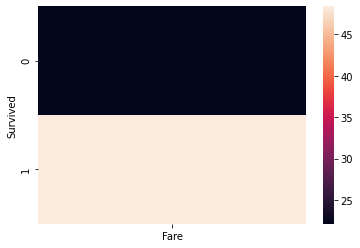

In [28]:
# 생존자의 요금 평균 vs 사망자의 요금 평균

sns.heatmap(ttnic_df[['Survived','Fare']].groupby(by=['Survived']).mean())
plt.show()

### $\rightarrow$ 검정 결과 : 확실히 살아남은 사람들의 Fare값이 더 높다.

## Mission 2.

## 부자들은 어떤 사람들 일까?
위의 타이타닉 데이터와 같이 부자들은 살아남는다.  
그럼 부자들은 어떤 사람일까?  
이를 **포브스가 선정한 2021년 억만장자 부자들** 데이터셋으로 확인해보려한다.

### 분석의 목적
$\rightarrow$ 부자들은 어떤 사람들일까?

### 데이터 파악하기

In [29]:
## 라이브러리 불러오기 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

rich_df = pd.read_csv('./forbes_billionaires.csv')
rich_df.head()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True


In [30]:
rich_df.dtypes

Name            object
NetWorth       float64
Country         object
Source          object
Rank             int64
Age            float64
Residence       object
Citizenship     object
Status          object
Children       float64
Education       object
Self_made       object
dtype: object

In [31]:
rich_df.isnull().sum()

Name              0
NetWorth          0
Country           0
Source            0
Rank              0
Age             125
Residence        40
Citizenship      16
Status          665
Children       1203
Education      1346
Self_made        18
dtype: int64

- 데이터는 부의 순위(Rank)에 따라 정렬되어 있다.
- 범주형 데이터가 많다.
- 칼럼당 결측치가 많고 의미하는 바가 다르다.

## 유의미한 Feature 찾기

### 1. Children

### **가설** : 부양해야할 자식이 있으면 더욱 화이팅해서 부자가 되려하지 않았을까?

In [32]:
# Children의 결측치(NaN) -> 0으로 자식이 없음 처리
rich_df.loc[ rich_df['Children'].isnull(),'Children'] = 0

rich_df[['NetWorth','Children']]

,NetWorth,Children
0,177.0,4.0
1,151.0,7.0
2,150.0,5.0
3,124.0,3.0
4,97.0,2.0
...,...,...
2750,1.0,0.0
2751,1.0,0.0
2752,1.0,0.0
2753,1.0,0.0


In [33]:
r = rich_df['NetWorth'].groupby(by=rich_df['Children']!=0).mean()
r

Children
False    3.690025
True     5.570232
Name: NetWorth, dtype: float64

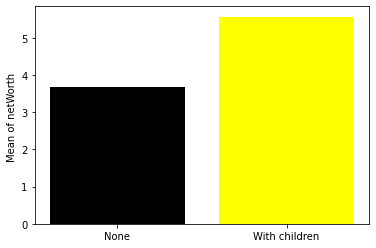

In [34]:
plt.bar(['None','With children'],height=r,color=['black','yellow'])
plt.ylabel('Mean of netWorth ')
plt.show()

### $\rightarrow$ 검정 결과 : 자식이 있는 사람들의 재산 평균값이 더 높다.

### 2. 부자들은 바쁘다고 가정에 소홀히 할까?

In [35]:
# 결측값 제외
r = rich_df.loc[rich_df['Status'].isnull() == False ]
r

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True
...,...,...,...,...,...,...,...,...,...,...,...,...
2743,Sandy Weill,1.0,United States,Citigroup,2674,88.0,"Sonoma, California",United States,Married,2.0,"Bachelor of Arts/Science, Cornell University",True
2744,Xia Zhisheng & family,1.0,China,home appliances,2674,79.0,"Haining, China",China,Married,0.0,NaN,True
2746,Vadim Yakunin,1.0,Russia,pharmacy,2674,58.0,"Moscow, Russia",Russia,Married,3.0,"Bachelor of Arts/Science, Moscow Institute of ...",True
2748,Yao Hsiao Tung,1.0,Singapore,Manufacturing,2674,81.0,"Singapore, Singapore",Singapore,Married,0.0,NaN,True


In [36]:
p = r['NetWorth'].groupby(by=r['Status']).mean()
p

Status
Divorced               5.817361
Engaged                1.725000
In Relationship       25.971429
Married                4.776701
Separated              1.860000
Single                 4.450000
Widowed                6.398947
Widowed, Remarried    18.000000
Name: NetWorth, dtype: float64

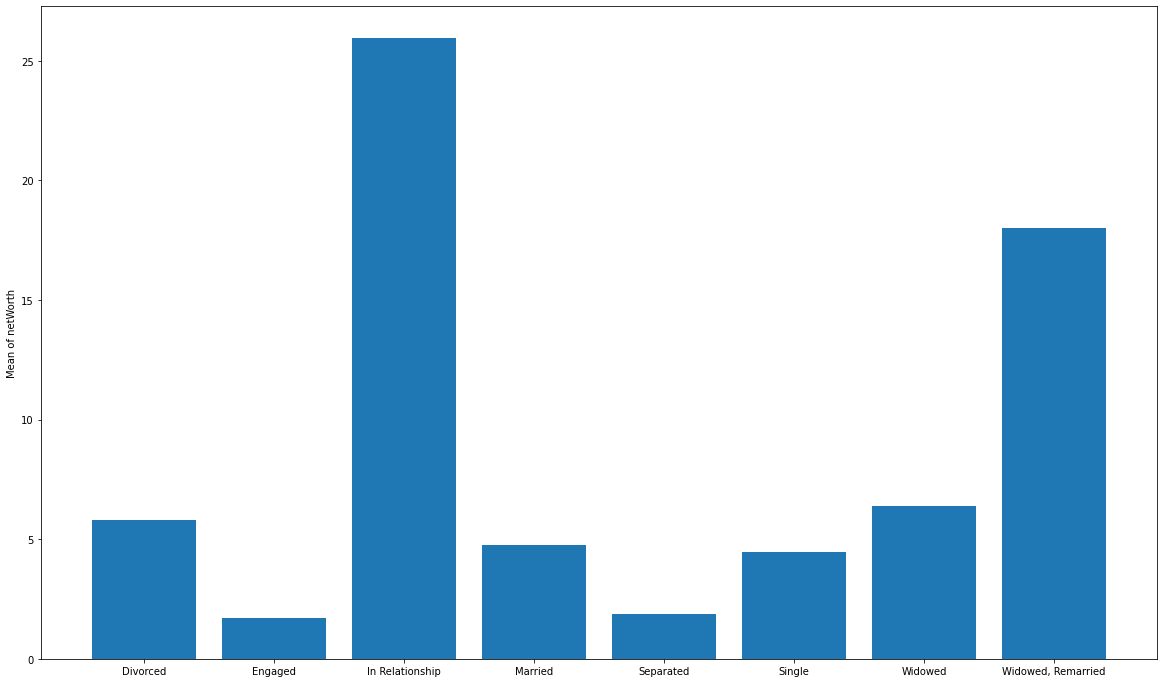

In [37]:
plt.figure(figsize=(20,12))
plt.ylabel('Mean of netWorth')
plt.bar(x=p.index,height=p)

plt.show()

### $\rightarrow$ 검정 결과 : 옆에 누군가가 함께하는 사람들의 자산이 높다.

### 3. 2021년도의 억만장자들은 Young&Rich 인가?

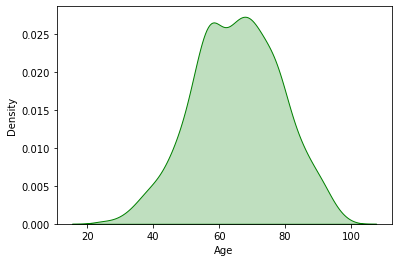

In [38]:
sns.kdeplot(r['Age'], color='Green',shade=True) # shade는 boolean값으로 True는 면에 색상
plt.show()

### $\rightarrow$ 검정 결과 : Young은 아니다.

-----